# Hotel Bookings Analysis:

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Reading data:

In [65]:
data=pd.read_csv("./Data/input/Hotel Bookings.csv")
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
70548,City Hotel,1,125,2017,June,25,18,2,0,2,...,No Deposit,9.0,NaN,0,Transient,117.00,0,0,Canceled,2017-05-13
39440,Resort Hotel,0,140,2017,August,33,17,0,1,2,...,No Deposit,240.0,NaN,0,Transient,231.00,0,2,Check-Out,2017-08-18
46084,City Hotel,1,106,2015,December,50,9,0,2,1,...,Non Refund,37.0,NaN,57,Transient,70.00,0,0,Canceled,2015-10-21
70560,City Hotel,1,120,2017,June,25,18,2,2,1,...,No Deposit,9.0,NaN,0,Transient,118.86,0,1,Canceled,2017-02-21
43237,City Hotel,0,15,2015,September,38,17,0,1,2,...,No Deposit,7.0,NaN,0,Transient,95.48,0,1,Check-Out,2015-09-18


## Data Cleaning:

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [67]:
data.shape

(119390, 32)

In [68]:
df= data.copy()

### 1. Check for missing values and find the best practice to deal with them 

In [69]:
df.iloc[:,0:16].isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       4
babies                         0
meal                           0
country                      488
market_segment                 0
distribution_channel           0
dtype: int64

In [70]:
df.iloc[:,15:32].isnull().sum()

distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

In [71]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [72]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [73]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [74]:
df['country'].isnull().sum()

488

In [75]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [76]:
df['children'].isnull().sum()

4

In [77]:
df['company'] = df['company'].replace(np.nan, -1)
df['agent'] = df['agent'].replace(np.nan, -1)
df = df.dropna(subset='country')
df = df.dropna(subset='children')

In [78]:
df.iloc[:,0:16].isnull().sum()

hotel                        0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     0
babies                       0
meal                         0
country                      0
market_segment               0
distribution_channel         0
dtype: int64

In [79]:
df.iloc[:,15:32].isnull().sum()

distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

### 2. Convert the dtypes to appropriate ones according to the values 

In [80]:
df.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      118898 non-null  object 
 1   is_canceled                118898 non-null  int64  
 2   lead_time                  118898 non-null  int64  
 3   arrival_date_year          118898 non-null  int64  
 4   arrival_date_month         118898 non-null  object 
 5   arrival_date_week_number   118898 non-null  int64  
 6   arrival_date_day_of_month  118898 non-null  int64  
 7   stays_in_weekend_nights    118898 non-null  int64  
 8   stays_in_week_nights       118898 non-null  int64  
 9   adults                     118898 non-null  int64  
 10  children                   118898 non-null  float64
 11  babies                     118898 non-null  int64  
 12  meal                       118898 non-null  object 
 13  country                    118898 

In [81]:
df.iloc[:,15:32].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distribution_channel            118898 non-null  object 
 1   is_repeated_guest               118898 non-null  int64  
 2   previous_cancellations          118898 non-null  int64  
 3   previous_bookings_not_canceled  118898 non-null  int64  
 4   reserved_room_type              118898 non-null  object 
 5   assigned_room_type              118898 non-null  object 
 6   booking_changes                 118898 non-null  int64  
 7   deposit_type                    118898 non-null  object 
 8   agent                           118898 non-null  float64
 9   company                         118898 non-null  float64
 10  days_in_waiting_list            118898 non-null  int64  
 11  customer_type                   118898 non-null  object 
 12  adr                  

In [82]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [83]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [84]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99,  95,  96,  69,  45,
        40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,  76,
         3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81, 368,
       364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,  86,
        52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,  34,
        27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,  67,
        55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,  22,
        91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58, 116,
        42, 321,  38, 118,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [85]:
print('Max:',df['lead_time'].max())
print("Min:",df['lead_time'].min())

Max: 737
Min: 0


In [86]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [87]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [88]:
print(df['arrival_date_week_number'].unique())
print('Max:',df['arrival_date_week_number'].max())
print('Min:',df['arrival_date_week_number'].min())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
Max: 53
Min: 1


In [89]:
print(df['arrival_date_day_of_month'].unique())
print('Max:',df['arrival_date_day_of_month'].max())
print('Min:',df['arrival_date_day_of_month'].min())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Max: 31
Min: 1


In [90]:
print(df['stays_in_weekend_nights'].unique())
print('Max:',df['stays_in_weekend_nights'].max())
print('Min:',df['stays_in_weekend_nights'].min())

[ 0  1  2  4  3  6 13  8  5  7 12  9 16 10 14]
Max: 16
Min: 0


In [91]:
print(df['stays_in_week_nights'].unique())
print('Max:',df['stays_in_week_nights'].max())
print('Min:',df['stays_in_week_nights'].min())

[ 0  1  2  3  4  5 11  8 10  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 25 17 32 26 18 34 35 41]
Max: 41
Min: 0


In [92]:
print(df['adults'].unique())
print('Max:',df['adults'].max())
print('Min:',df['adults'].min())

[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
Max: 55
Min: 0


In [93]:
print(df['children'].unique())
print('Max:',df['children'].max())
print('Min:',df['children'].min())

[ 0.  1.  2. 10.  3.]
Max: 10.0
Min: 0.0


In [94]:
print(df['babies'].unique())
print('Max:',df['babies'].max())
print('Min:',df['babies'].min())

[ 0  1  2 10  9]
Max: 10
Min: 0


In [95]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [96]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [97]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [98]:
print(df['is_repeated_guest'].unique())

[0 1]


In [99]:
print(df['previous_cancellations'].unique())
print('Max:',df['previous_cancellations'].max())
print('Min:',df['previous_cancellations'].min())

[ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]
Max: 26
Min: 0


In [100]:
print(df['previous_bookings_not_canceled'].unique())
print('Max:',df['previous_bookings_not_canceled'].max())
print('Min:',df['previous_bookings_not_canceled'].min())

[ 0  1  2  3  5  4  6  7  8  9 10 11 12 13 14 15 21 24 25 27 28 30 16 17
 18 19 20 22 23 26 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Max: 72
Min: 0


In [101]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [102]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

In [103]:
print(df['booking_changes'].unique())
print('Max:',df['booking_changes'].max())
print('Min:',df['booking_changes'].min())

[ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]
Max: 21
Min: 0


In [104]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [105]:
print(df['agent'].unique())
print('Max:',df['agent'].max())
print('Min:',df['agent'].min())

[ -1. 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
  34. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195. 352. 355. 159.
 139. 363. 384. 360. 331. 367.  64.  78. 406. 163. 414. 333. 427. 431.
 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.  59.
 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508. 535.
 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.  45.
  37. 

In [106]:
print(df['company'].unique())
print('Max:',df['company'].max())
print('Min:',df['company'].min())

[ -1. 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.  83.
 416.  51. 395. 102.  34.  84. 360. 394. 382. 461. 478. 112. 486. 421.
   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203. 263. 477. 521.
 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355. 254. 543. 531.
 528. 120.  81. 116. 530. 103.  62.  39.  16.  61.  92. 501. 291. 290.
 192.  43. 465. 287. 297. 207. 437. 165. 329. 272.  28.  77. 482. 200.
  42. 338. 108.  72. 246. 319. 146. 159. 380. 323. 511. 407. 325. 278.
  80. 403. 399.  14. 137. 343. 346. 347. 349. 289. 351. 353.  54.  99.
 358. 361. 362. 366. 372. 365. 277. 109. 377. 379.  22. 378. 330. 364.
 401. 232. 255. 384. 167. 212. 514. 391. 400. 376. 402. 396. 302. 398.
 225.   6. 370. 369. 409. 168. 104. 408. 413. 148.  10. 333. 419. 415.
 424. 425. 423. 422. 435. 439. 442. 282. 448. 443. 454. 444.  52. 459.
 458. 

In [107]:
print(df['days_in_waiting_list'].unique())
print('Max:',df['days_in_waiting_list'].max())
print('Min:',df['days_in_waiting_list'].min())

[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]
Max: 391
Min: 0


In [108]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [109]:
print(df['adr'].unique())
print('Max:',df['adr'].max())
print('Min:',df['adr'].min())

[  0.    75.    98.   ... 266.75 209.25 157.71]
Max: 5400.0
Min: -6.38


In [110]:
adr_tail= df['adr'].sort_values().head(10)
adr_tail

14969   -6.38
2242     0.00
76651    0.00
76644    0.00
76643    0.00
76642    0.00
28201    0.00
76641    0.00
2240     0.00
0        0.00
Name: adr, dtype: float64

In [111]:
print(df['required_car_parking_spaces'].unique())
print('Max:',df['required_car_parking_spaces'].max())
print('Min:',df['required_car_parking_spaces'].min())

[0 1 2 8 3]
Max: 8
Min: 0


In [112]:
print(df['total_of_special_requests'].unique())
print('Max:',df['total_of_special_requests'].max())
print('Min:',df['total_of_special_requests'].min())

[0 1 3 2 4 5]
Max: 5
Min: 0


In [113]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [114]:
df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-16',
       '2015-05-29', '2015-05-19', '2015-06-19', '2015-05-23',
       '2015-05-18', '2015-07-09', '2015-06-02', '2015-07-13',
       '2015-07-04', '2015-06-29', '2015-06-16', '2015-06-18',
       '2015-06-12', '2015-06-09', '2015-05-26', '2015-07-11',
       '2015-07-12', '2015-07-17', '2015-04-15', '2015-05-13',
       '2015-07-10', '2015-05-20', '2015-05-12', '2015-07-14',
       '2015-06-17', '2015-05-01', '2015-03-30', '2015-07-15',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [115]:
df["hotel"] = df["hotel"].astype("category")
df["is_canceled"] = df["is_canceled"].astype("uint8")
df["lead_time"] = df["lead_time"].astype("uint16")
df["arrival_date_year"] = df["arrival_date_year"].astype("uint16")
df["arrival_date_month"] = df["arrival_date_month"].astype("category")
df["arrival_date_week_number"] = df["arrival_date_week_number"].astype("uint8")
df["arrival_date_day_of_month"] = df["arrival_date_day_of_month"].astype("uint8")
df["stays_in_weekend_nights"] = df["stays_in_weekend_nights"].astype("uint8")
df["stays_in_week_nights"] = df["stays_in_week_nights"].astype("uint8")
df["adults"] = df["adults"].astype("uint8")
df["children"] = df["children"].astype("uint8")
df["babies"] = df["babies"].astype("uint8")
df["meal"] = df["meal"].astype("category")
df["market_segment"] = df["market_segment"].astype("category")
df["distribution_channel"] = df["distribution_channel"].astype("category")
df["is_repeated_guest"] = df["is_repeated_guest"].astype("uint8")
df["previous_cancellations"] = df["previous_cancellations"].astype("uint8")
df["previous_bookings_not_canceled"] = df["previous_bookings_not_canceled"].astype("uint8")
df["reserved_room_type"] = df["reserved_room_type"].astype("category")
df["assigned_room_type"] = df["assigned_room_type"].astype("category")
df["booking_changes"] = df["booking_changes"].astype("uint8")
df["deposit_type"] = df["deposit_type"].astype("category")
df["agent"] = df["agent"].astype("int16")
df["company"] = df["company"].astype("int16")
df["days_in_waiting_list"] = df["days_in_waiting_list"].astype("uint16")
df["customer_type"] = df["customer_type"].astype("category")
df["adr"] = df["adr"].astype("float64")
df["required_car_parking_spaces"] = df["required_car_parking_spaces"].astype("uint8")
df["total_of_special_requests"] = df["total_of_special_requests"].astype("uint8")
df["reservation_status"] = df["reservation_status"].astype("category")
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [116]:
df.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   hotel                      118898 non-null  category
 1   is_canceled                118898 non-null  uint8   
 2   lead_time                  118898 non-null  uint16  
 3   arrival_date_year          118898 non-null  uint16  
 4   arrival_date_month         118898 non-null  category
 5   arrival_date_week_number   118898 non-null  uint8   
 6   arrival_date_day_of_month  118898 non-null  uint8   
 7   stays_in_weekend_nights    118898 non-null  uint8   
 8   stays_in_week_nights       118898 non-null  uint8   
 9   adults                     118898 non-null  uint8   
 10  children                   118898 non-null  uint8   
 11  babies                     118898 non-null  uint8   
 12  meal                       118898 non-null  category
 13  country            

In [117]:
df.iloc[:,15:32].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   distribution_channel            118898 non-null  category      
 1   is_repeated_guest               118898 non-null  uint8         
 2   previous_cancellations          118898 non-null  uint8         
 3   previous_bookings_not_canceled  118898 non-null  uint8         
 4   reserved_room_type              118898 non-null  category      
 5   assigned_room_type              118898 non-null  category      
 6   booking_changes                 118898 non-null  uint8         
 7   deposit_type                    118898 non-null  category      
 8   agent                           118898 non-null  int16         
 9   company                         118898 non-null  int16         
 10  days_in_waiting_list            118898 non-null  uint16      

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  category      
 1   is_canceled                     118898 non-null  uint8         
 2   lead_time                       118898 non-null  uint16        
 3   arrival_date_year               118898 non-null  uint16        
 4   arrival_date_month              118898 non-null  category      
 5   arrival_date_week_number        118898 non-null  uint8         
 6   arrival_date_day_of_month       118898 non-null  uint8         
 7   stays_in_weekend_nights         118898 non-null  uint8         
 8   stays_in_week_nights            118898 non-null  uint8         
 9   adults                          118898 non-null  uint8         
 10  children                        118898 non-null  uint8       

### 3. Check for the duplicate values and remove them from data 

In [119]:
df.duplicated().sum()

31958

In [120]:
df = df.drop_duplicates()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86940 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86940 non-null  category      
 1   is_canceled                     86940 non-null  uint8         
 2   lead_time                       86940 non-null  uint16        
 3   arrival_date_year               86940 non-null  uint16        
 4   arrival_date_month              86940 non-null  category      
 5   arrival_date_week_number        86940 non-null  uint8         
 6   arrival_date_day_of_month       86940 non-null  uint8         
 7   stays_in_weekend_nights         86940 non-null  uint8         
 8   stays_in_week_nights            86940 non-null  uint8         
 9   adults                          86940 non-null  uint8         
 10  children                        86940 non-null  uint8         
 11  babies

### 4. According to the columns and their meanings, do any other preprocessings necessary for further analysis.

In [122]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_dict)

df['arrival_datetime'] = pd.to_datetime({
    'year': df['arrival_date_year'],
    'month': df['arrival_date_month'],
    'day': df['arrival_date_day_of_month']})

df["arrival_date_month"] = df["arrival_date_month"].astype("uint8")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86940 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86940 non-null  category      
 1   is_canceled                     86940 non-null  uint8         
 2   lead_time                       86940 non-null  uint16        
 3   arrival_date_year               86940 non-null  uint16        
 4   arrival_date_month              86940 non-null  uint8         
 5   arrival_date_week_number        86940 non-null  uint8         
 6   arrival_date_day_of_month       86940 non-null  uint8         
 7   stays_in_weekend_nights         86940 non-null  uint8         
 8   stays_in_week_nights            86940 non-null  uint8         
 9   adults                          86940 non-null  uint8         
 10  children                        86940 non-null  uint8         
 11  babies

In [124]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_datetime
12975,Resort Hotel,1,173,2017,7,30,26,0,3,2,...,314,-1,0,Transient,115.20,0,0,Canceled,2017-07-16,2017-07-26
47395,City Hotel,1,26,2016,2,8,19,0,2,2,...,9,-1,0,Transient,91.00,0,0,Canceled,2016-01-24,2016-02-19
59558,City Hotel,1,7,2016,10,44,29,2,1,2,...,9,-1,0,Transient,126.67,0,1,Canceled,2016-10-22,2016-10-29
11980,Resort Hotel,1,35,2017,6,23,7,0,1,2,...,-1,251,0,Transient,126.00,0,0,Canceled,2017-05-03,2017-06-07
16354,Resort Hotel,0,83,2015,8,34,17,3,6,1,...,-1,-1,0,Transient-Party,150.60,0,1,Check-Out,2015-08-26,2015-08-17


## Analysis: 

### 1. There are two types of hotels in the dataset, which type of hotels booked most?

In [125]:
df["hotel"].unique()

['Resort Hotel', 'City Hotel']
Categories (2, object): ['City Hotel', 'Resort Hotel']

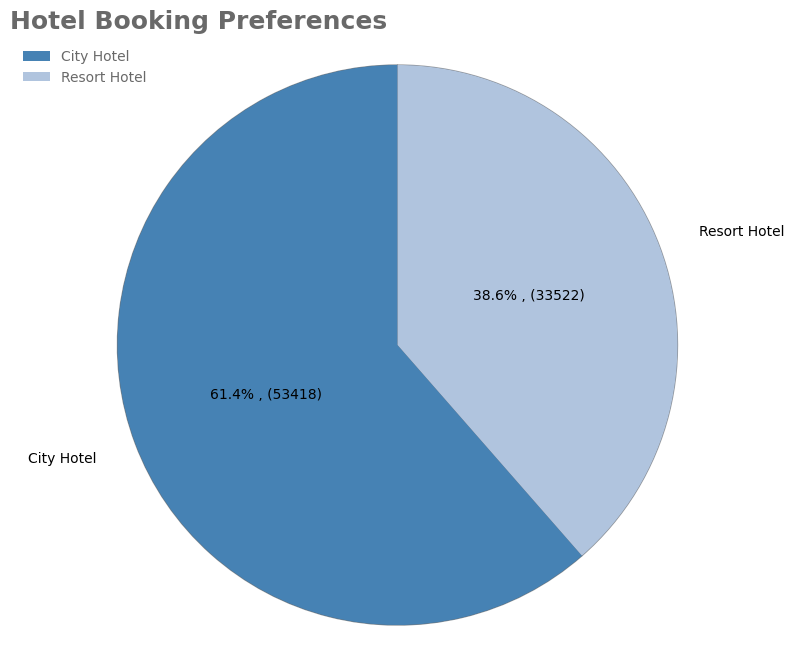

In [126]:
hotel_type_counts = df['hotel'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(hotel_type_counts, labels=hotel_type_counts.index,       
        colors=['#4682B4', '#B0C4DE'],
        shadow=True,
        autopct=lambda p:f'{p:1.1f}% , ({p*sum(hotel_type_counts)/100 :1.0f})' ,
        startangle=90,
        radius=200,
        pctdistance=0.5,
        labeldistance=1.15
        )

ax.axis('equal')

ax.set_title('Hotel Booking Preferences',
    weight="bold",
    color='#696969',
    fontsize=18,
    loc="left")

ax.legend(frameon=False,
          loc='upper left',
          labelcolor='#696969')

plt.show()

### Hotel Booking Preferences

**Key Observations:**

"According to the diagram, ``City Hotel`` has captured over ``61%`` of the total reservations, indicating a substantial preference for it over Resort Hotel."

 ### 2.What percentage of bookings were cancelled?

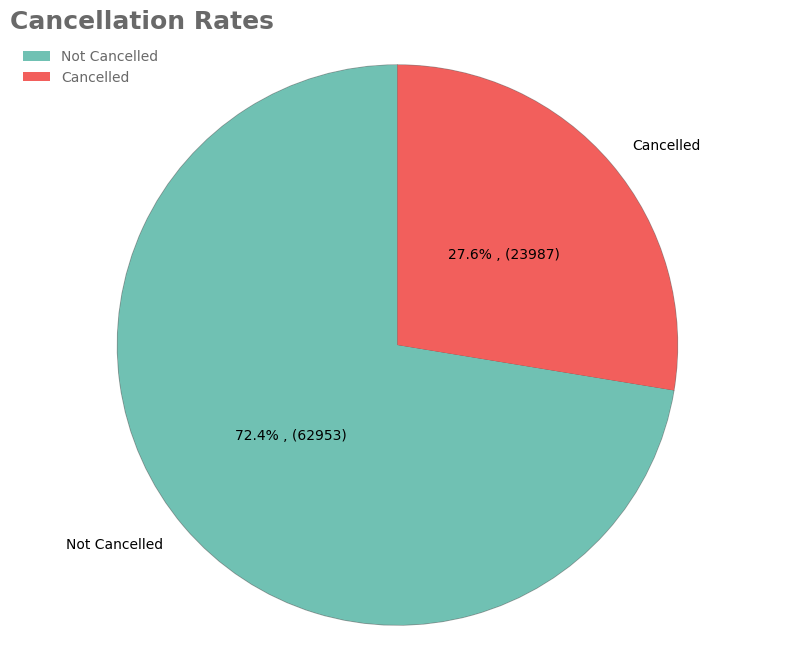

In [127]:
bookings_cancelled = df['is_canceled'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))

labels = ['Not Cancelled','Cancelled' ]
colors = ['#70c1b3', '#f25f5c']

ax.pie(bookings_cancelled, labels=labels,       
        colors=colors,
        shadow=True,
        autopct=lambda p:f'{p:1.1f}% , ({p*sum(bookings_cancelled)/100 :1.0f})' ,
        startangle=90,
        radius=200,
        pctdistance=0.5,
        labeldistance=1.1
        )

ax.axis('equal')

ax.set_title('Cancellation Rates',
    weight="bold",
    color='#696969',
    fontsize=18,
    loc="left")

ax.legend(frameon=False,
          loc='upper left',
          labelcolor='#696969')

plt.show()

### Cancellation Rates

**Key Observations:**

"The chart reveals a cancellation rate of approximately ``27%`` for all reservations."